In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("./Dataset/archive/Thyroid_Diff.csv")
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [3]:
df.shape

(383, 17)

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [5]:
df.nunique()

Age                     65
Gender                   2
Smoking                  2
Hx Smoking               2
Hx Radiothreapy          2
Thyroid Function         5
Physical Examination     5
Adenopathy               6
Pathology                4
Focality                 2
Risk                     3
T                        7
N                        3
M                        2
Stage                    5
Response                 4
Recurred                 2
dtype: int64

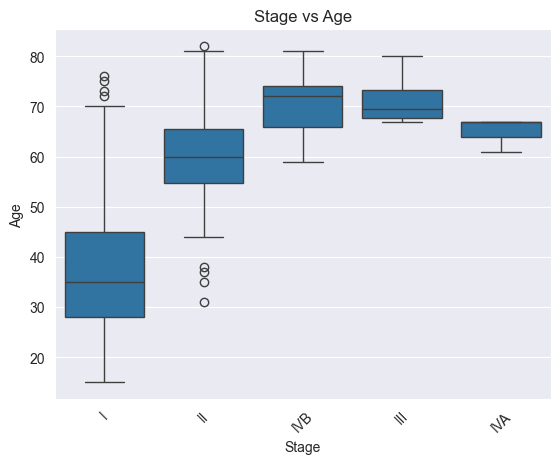

In [6]:
import seaborn as sns
sns.boxplot(x=df['Stage'],y=df['Age'])
plt.xlabel('Stage')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.title('Stage vs Age')
plt.show()

Outliers are present in the dataset. We will remove them in the next step.

In [7]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
df = df[(df['Age'] > lower_bound) & (df['Age'] < upper_bound)]
df.shape

(383, 17)

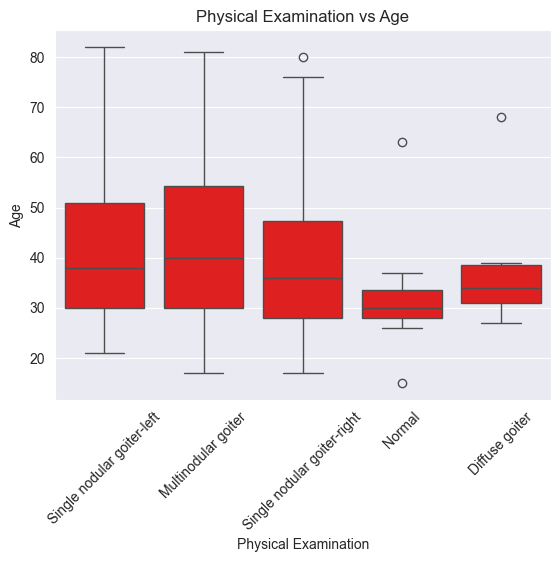

In [8]:
sns.boxplot(x=df['Physical Examination'],y=df['Age'],color='red')
plt.xlabel('Physical Examination')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.title('Physical Examination vs Age')
plt.show()

Most of the people who are getting examined are in the age group of 30-60.

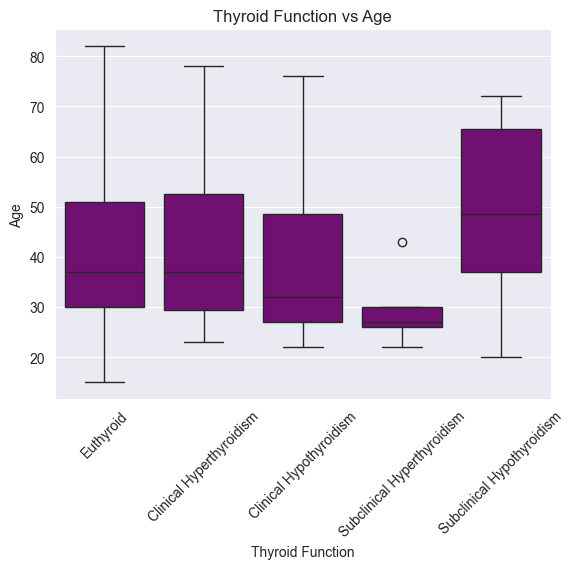

In [9]:
sns.boxplot(x=df['Thyroid Function'],y=df['Age'],color='purple')
plt.xlabel('Thyroid Function')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.title('Thyroid Function vs Age')
plt.show()

The frequency of people with subclinical hypothyrodism is higher than the other categories and common in the age group os 35- 65.

In [10]:
df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [11]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Smoking History', 'Radiotherapy History',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Types of Thyroid Cancer (Pathology)', 'Focality', 'Risk', 'Tumor',
       'Lymph Nodes', 'Cancer Metastasis', 'Stage', 'Treatment Response',
       'Recurred'],
      dtype='object')

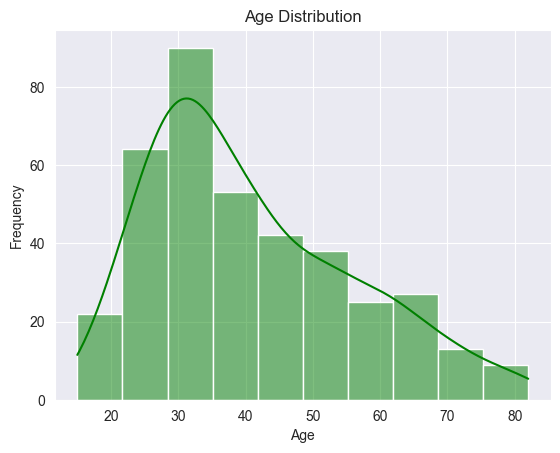

In [12]:
sns.histplot(df['Age'],kde=True,color='green',bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Age Distribution')
plt.show()

Maximum number of people are in the age group of 20-40

C:\Users\supriya shrivastv\PycharmProjects\venvs\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


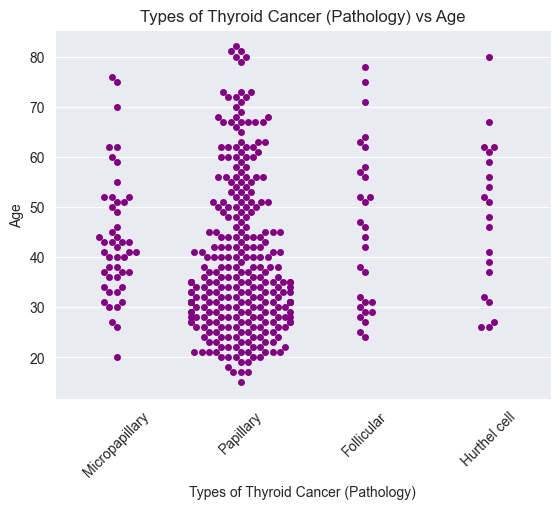

In [13]:
sns.swarmplot(x=df['Types of Thyroid Cancer (Pathology)'],y=df['Age'],color='purple')
plt.xlabel('Types of Thyroid Cancer (Pathology)')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.title('Types of Thyroid Cancer (Pathology) vs Age')
plt.show()

Maximum Density of thyroid cancer is papillary in the age group 20-50.

C:\Users\supriya shrivastv\PycharmProjects\venvs\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\supriya shrivastv\PycharmProjects\venvs\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


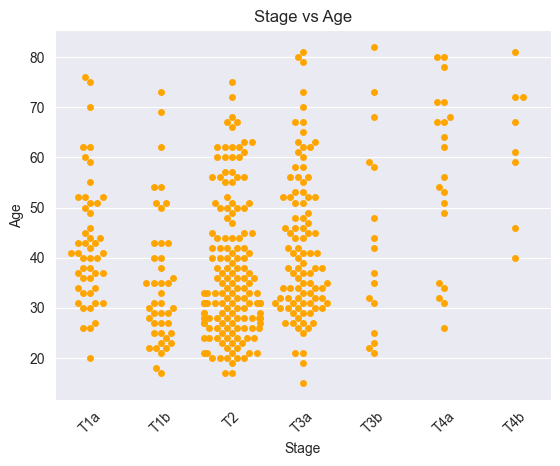

In [14]:
sns.swarmplot(x=df['Tumor'],y=df['Age'],color='orange')
plt.xlabel('Stage')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.title('Stage vs Age')
plt.show()

Maximum number of tumor is of type T2.

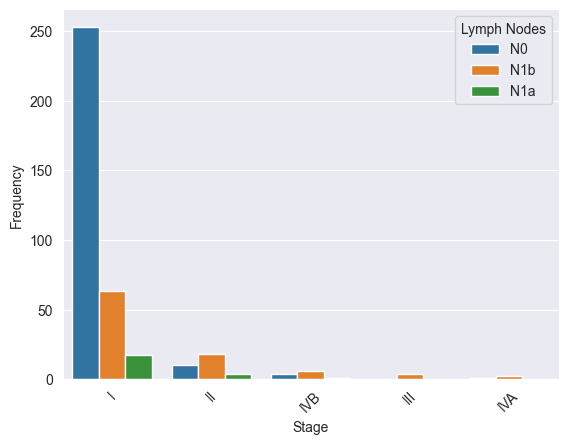

In [15]:
sns.color_palette("husl", 8)
sns.countplot(x=df['Stage'],hue=df['Lymph Nodes'])
plt.xlabel('Stage')
plt.ylabel('Frequency') 
plt.xticks(rotation=45)
plt.show()

Maximum number of people have lymph nodes of type N0 at stage 1.

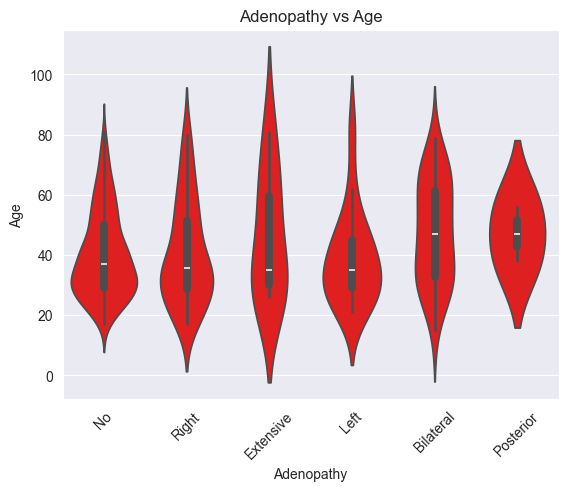

In [16]:
sns.violinplot(x=df['Adenopathy'],y=df['Age'],color='red')
plt.xlabel('Adenopathy')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.title('Adenopathy vs Age')
plt.show()

# Encoding the Categorical Variables

In [17]:
df.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [18]:
df.nunique()

Age                                    65
Gender                                  2
Smoking                                 2
Smoking History                         2
Radiotherapy History                    2
Thyroid Function                        5
Physical Examination                    5
Adenopathy                              6
Types of Thyroid Cancer (Pathology)     4
Focality                                2
Risk                                    3
Tumor                                   7
Lymph Nodes                             3
Cancer Metastasis                       2
Stage                                   5
Treatment Response                      4
Recurred                                2
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
cols_to_encode=['Gender', 'Smoking', 'Smoking History', 'Radiotherapy History',
       'Thyroid Function', 'Physical Examination', 'Adenopathy',
       'Types of Thyroid Cancer (Pathology)', 'Focality', 'Risk', 'Tumor',
       'Lymph Nodes', 'Cancer Metastasis', 'Stage', 'Treatment Response',
       'Recurred']
for cols in cols_to_encode:
    df[cols] = le.fit_transform(df[cols])

In [21]:
df.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


In [22]:
df.dtypes

Age                                    int64
Gender                                 int32
Smoking                                int32
Smoking History                        int32
Radiotherapy History                   int32
Thyroid Function                       int32
Physical Examination                   int32
Adenopathy                             int32
Types of Thyroid Cancer (Pathology)    int32
Focality                               int32
Risk                                   int32
Tumor                                  int32
Lymph Nodes                            int32
Cancer Metastasis                      int32
Stage                                  int32
Treatment Response                     int32
Recurred                               int32
dtype: object

# Splitting of data

In [23]:
X=df.drop('Recurred',axis=1)
y=df['Recurred']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train=X_train/255
X_test=X_test/255

In [25]:
X_train.shape

(306, 16)

In [26]:
X_test.shape

(77, 16)

# Model Building

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf=RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [29]:
rf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [30]:
rf.score(X_test,y_test)

0.948051948051948

# Classification Report

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.96      0.88      0.92        26

    accuracy                           0.95        77
   macro avg       0.95      0.93      0.94        77
weighted avg       0.95      0.95      0.95        77



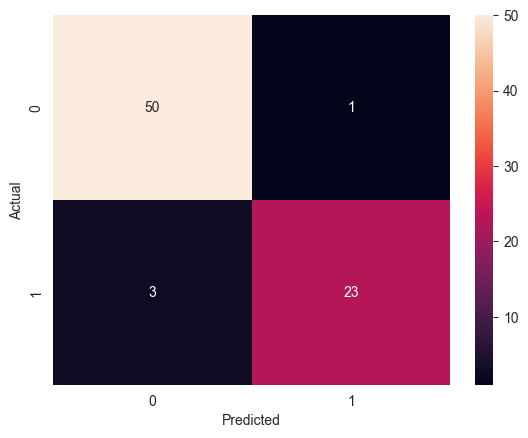

In [37]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()